<font size="6">**Import Libraries**</font>


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<font size="6">**Data Preprocessing**</font>


In [2]:

# Define directory path
data_dir = '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset'

# List directories and files in data_dir
for dirname, _, filenames in os.walk(data_dir):
    print(f"Directory: {dirname}")
    print(f"Sample files: {filenames[:2]}")

Directory: /kaggle/input/cbis-ddsm-breast-cancer-image-dataset
Sample files: []
Directory: /kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg
Sample files: []
Directory: /kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.426013102412536473840491086280519425818
Sample files: ['1-223.jpg']
Directory: /kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.16568542011655175430071162144126831780
Sample files: ['2-089.jpg', '1-111.jpg']
Directory: /kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.116437756113164247142539498550746659420
Sample files: ['1-051.jpg', '2-203.jpg']
Directory: /kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.265953197912973660327069359641506533925
Sample files: ['1-288.jpg']
Directory: /kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.295670217913556255928452747763741622478
Sample files: ['1-213.jpg', '2-12

In [3]:
# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    validation_split=0.2,    # 20% of data for validation
    rotation_range=20,       # Random rotation
    width_shift_range=0.2,   # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,         # Random shear
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Random horizontal flip
    fill_mode='nearest'      # Fill lost pixels with nearest value
)

In [57]:

# Training data generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size= 64,
    class_mode='binary',
    subset='training'
)


Found 8190 images belonging to 2 classes.


In [58]:
# Validation data generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary',
    subset='validation'
)

Found 2047 images belonging to 2 classes.


In [59]:
print("Train generator image shape:", train_generator.image_shape)
print("Validation generator image shape:", validation_generator.image_shape)


Train generator image shape: (64, 64, 3)
Validation generator image shape: (64, 64, 3)


<font size="6">**Custom CNN Implementation**</font>


In [60]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

input_layer = Input(shape=(64, 64, 3))  # Smaller input size for simpler model
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model1 = Model(inputs=input_layer, outputs=output_layer)
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,337 (3.14 MB)

 Trainable params: 822,337 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model1.fit(
    train_generator,
    epochs= 2,  # Increase epochs as needed
    validation_data=validation_generator,
    batch_size=16,  # Adjust batch size
    shuffle=True,
    callbacks=[early_stopping]
)

Epoch 1/2
128/128 ━━━━━━━━━━━━━━━━━━━━ 410s 3s/step - accuracy: 0.9638 - loss: 0.0567 - val_accuracy: 1.0000 - val_loss: 2.8719e-13
Epoch 2/2
128/128 ━━━━━━━━━━━━━━━━━━━━ 496s 4s/step - accuracy: 1.0000 - loss: 2.9378e-10 - val_accuracy: 1.0000 - val_loss: 2.5638e-13


<font size="6">**Model Evaluation**</font>


32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 1.0000 - loss: 2.7049e-13
Validation accuracy: 1.0


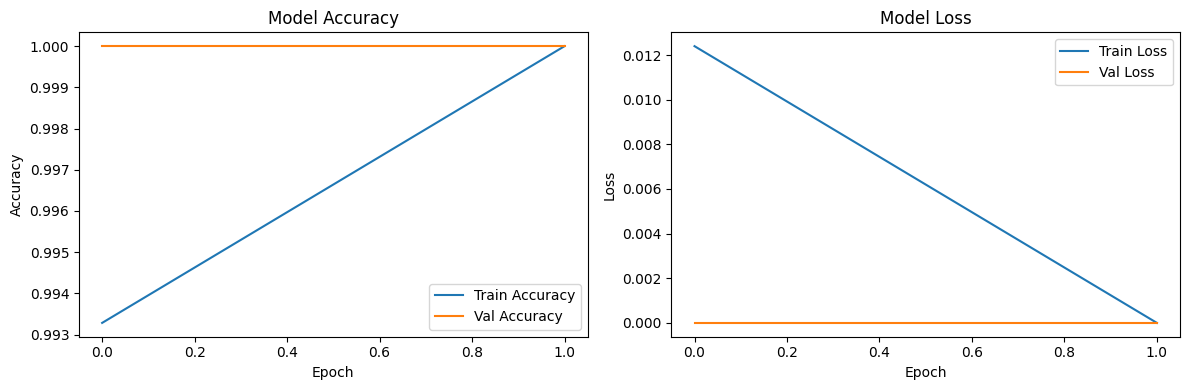

In [64]:

# Evaluate the model
test_loss, test_accuracy = model1.evaluate(validation_generator)
print(f"Validation accuracy: {test_accuracy}")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
